# Algorithm Testing

In [13]:
import heapq
from sys import stdin, stdout
import numpy as np
from igraph import *

In [ ]:
# utility functions for yen_igraph

In [ ]:
def yen_igraph(graph, source, target, num_k, weights):
    #Shortest path from the source to the target
    A = [graph.get_shortest_paths(source,
                                  to=target,
                                  weights=weights,
                                  output="vpath")[0]]
    A_costs = [path_cost(graph, A[0], weights)]

    #Initialize the heap to store the potential kth shortest path
    B = Queue.PriorityQueue()

    for k in range(1, num_k):
        # The spur node ranges from the first node to the next to last node in
        # the shortest path
        for i in range(len(A[k-1])-1):
            #Spur node is retrieved from the previous k-shortest path, k - 1
            spurNode = A[k-1][i]
            # The sequence of nodes from the source to the spur node of the
            # previous k-shortest path
            rootPath = A[k-1][:i]

            #We store the removed edges
            removed_edges = []

            for path in A:
                if len(path) - 1 > i and rootPath == path[:i]:
                    # Remove the links that are part of the previous shortest
                    # paths which share the same root path
                    edge = graph.es.select(_source=min(path[i], path[i+1]),
                                           _target=max(path[i], path[i+1]))
                    # select the edge between i-th and (i+1)-th node
                    
                    if len(edge) == 0:
                        continue
                    edge = edge[0]
                    removed_edges.append((path[i],
                                     path[i+1],
                                     edge.attributes()))
                    edge.delete()

            #Calculate the spur path from the spur node to the sink
            while True:
                spurPath = graph.get_shortest_paths(spurNode,
                                                to=target,
                                                weights=weights,
                                                output="vpath")[0]
                [is_loop, loop_element] = in_lists(spurPath, rootPath)

                if not is_loop:
                    break
                else:
                    loop_index = spurPath.index(loop_element)
                    edge = graph.es.select(_source=min(spurPath[loop_index],
                                                       spurPath[loop_index-1]),
                                           _target=max(spurPath[loop_index],
                                                       spurPath[loop_index-1]))

                    if len(edge) == 0:
                        continue

                    edge = edge[0]
                    removed_edges.append((spurPath[loop_index],
                                         spurPath[loop_index-1],
                                         edge.attributes()))
                    edge.delete()

            #Add back the edges that were removed from the graph
            for removed_edge in removed_edges:
                node_start, node_end, cost = removed_edge
                graph.add_edge(node_start, node_end)
                edge = graph.es.select(_source=min(node_start, node_end),
                                   _target=max(node_start, node_end))[0]
                edge.update_attributes(cost)

            if len(spurPath) > 0:
                #Entire path is made up of the root path and spur path
                totalPath = rootPath + spurPath
                totalPathCost = path_cost(graph, totalPath, weights)
                #Add the potential k-shortest path to the heap
                B.put((totalPathCost, totalPath))

        #Sort the potential k-shortest paths by cost
        #B is already sorted
        #Add the lowest cost path becomes the k-shortest path.
        while True:
            if B.qsize() == 0:
                break
            cost_, path_ = B.get()
            if path_ not in A:
                #We found a new path to add
                A.append(path_)
                A_costs.append(cost_)
                break

        if not len(A) > k:
            break

    return A, A_costs


TypeError: float() argument must be a string or a number

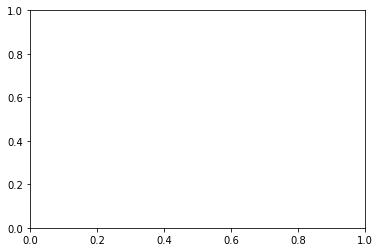

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from igraph import *

vertices = ["one", "two", "three"]
edges = [(0,2),(2,1),(0,1)]

g = Graph(vertex_attrs={"label": vertices}, edges=edges, directed=True)

g

In [1]:
import pickle as pk

In [9]:
with open('output/out_predpath_sub_sample_2018-08-22.pkl', 'rb') as handle:
    model = pk.load(handle)

In [8]:
vec

'model'

In [7]:
model['dictvectorizer']

TypeError: string indices must be integers, not str